# **CLASE 7 - INTRO A MACHINE LEARNING**

## **Caso de Estudio: El Titanic**

### Diccionario de Datos

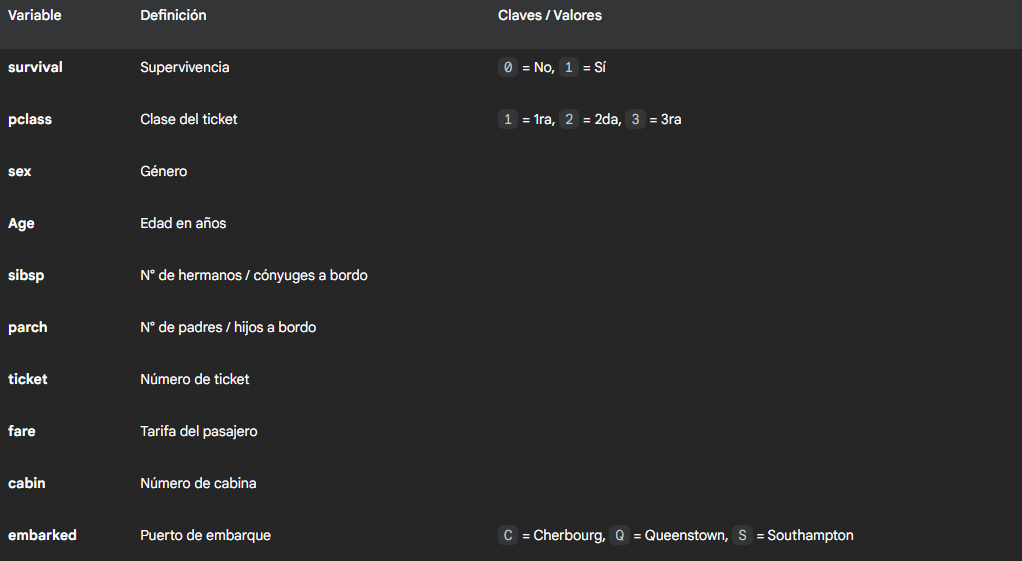

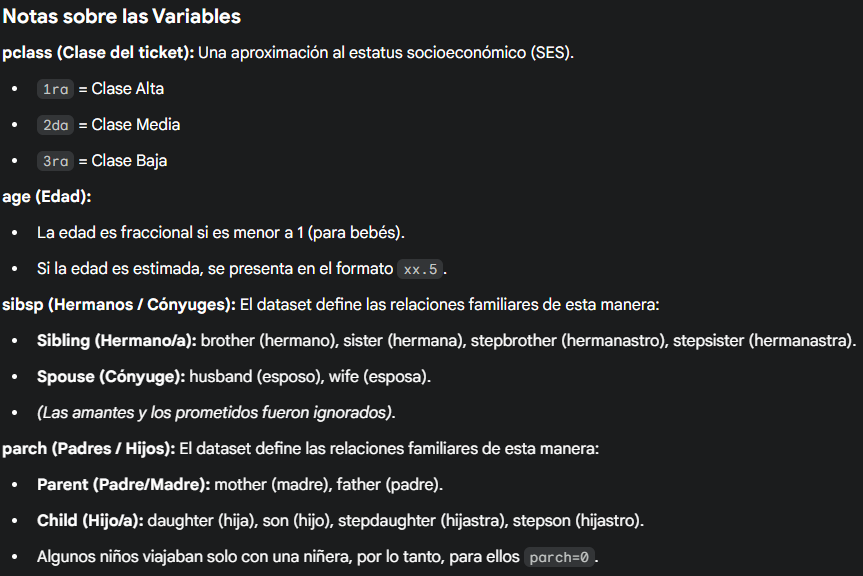

### Importamos librerías

In [1]:
# ---
# Paso 1: Importar Librerías
# ---
# Importamos las herramientas que necesitaremos.
# pandas: para manipulación de datos (nuestros DataFrames)
# matplotlib y seaborn: para visualización (aunque los usaremos más adelante)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Librerías Importadas ---")

--- Librerías Importadas ---


### Carga de datos

In [2]:
# ---
# Paso 2: Cargar los Datos
# ---
# Cargamos nuestros archivos CSV en DataFrames de pandas.


train_df = pd.read_csv('/content/train.csv')

test_df = pd.read_csv('/content/test.csv')

In [3]:
# Damos un primer vistazo a los datos de entrenamiento
print("\nPrimeras 5 filas del dataset de ENTRENAMIENTO (train_df):")
train_df.head()


Primeras 5 filas del dataset de ENTRENAMIENTO (train_df):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Damos un primer vistazo a los datos de testeo
print("\nPrimeras 5 filas del dataset de TESTEO (test_df):")
test_df.head()


Primeras 5 filas del dataset de TESTEO (test_df):


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Revisar la Dimensión (Shape)

In [5]:
# ---
# Paso 3: Revisar la Dimensión (Shape)
# ---
# Vemos cuántas filas (pasajeros) y columnas (features) tenemos.

print("\n--- Paso 3: Dimensión de los Datos ---")
print(f"Dataset de Entrenamiento (Train): {train_df.shape[0]} filas, {train_df.shape[1]} columnas")
print(f"Dataset de Prueba (Test):       {test_df.shape[0]} filas, {test_df.shape[1]} columnas")
print("Observación: El dataset de prueba tiene una columna menos (falta 'Survived').")


--- Paso 3: Dimensión de los Datos ---
Dataset de Entrenamiento (Train): 891 filas, 12 columnas
Dataset de Prueba (Test):       418 filas, 11 columnas
Observación: El dataset de prueba tiene una columna menos (falta 'Survived').


### Controlar Nulos y Tipos de Datos

In [6]:
# ---
# Paso 4: Controlar Nulos y Tipos de Datos
# ---
# Usamos .info() para obtener un resumen crucial de nuestro dataset de entrenamiento.
# - ¿Qué tipo de dato (Dtype) tiene cada columna? (object = texto)
# - ¿Cuántos valores no nulos (Non-Null) hay? (para detectar nulos)

print("\n--- Paso 4: Información de Variables (Nulos y Tipos) ---")
print("Análisis del dataset de ENTRENAMIENTO (train_df.info()):\n")
train_df.info()

print("\nObservaciones de .info():")
print("- 'Age' y 'Cabin' tienen valores nulos (NaNs) que deberemos tratar.")
print("- 'Sex' y 'Embarked' son de tipo 'object' (texto) y deberán ser convertidas a números.")


--- Paso 4: Información de Variables (Nulos y Tipos) ---
Análisis del dataset de ENTRENAMIENTO (train_df.info()):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Observaciones de .info():
- 'Age' y 'Cabin' tienen valores nulos (NaNs) que deberemos tratar.
- 'Sex' y 'Embarked' son de tipo 

### Analizar la Variable Objetivo (Balanceo)

In [7]:
# ---
# Paso 5: Analizar la Variable Objetivo (Balanceo)
# ---
# Revisamos la distribución de nuestra variable objetivo: 'Survived'.
# ¿Cuántos sobrevivieron (1) vs. cuántos no (0)?

print("\n--- Paso 5: Análisis de Balanceo de la Variable 'Survived' ---")
print("Conteo de 'Survived' (0 = No, 1 = Sí):")
print(train_df['Survived'].value_counts())

print("\nPorcentaje de 'Survived':")
# normalize=True nos da los porcentajes
print(train_df['Survived'].value_counts(normalize=True) * 100)

print("\nObservación:")
print("El dataset está desbalanceado (aprox. 61.6% 'No' vs 38.4% 'Sí').")
print("Es un desbalanceo leve, pero debemos tenerlo en cuenta.")


--- Paso 5: Análisis de Balanceo de la Variable 'Survived' ---
Conteo de 'Survived' (0 = No, 1 = Sí):
Survived
0    549
1    342
Name: count, dtype: int64

Porcentaje de 'Survived':
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Observación:
El dataset está desbalanceado (aprox. 61.6% 'No' vs 38.4% 'Sí').
Es un desbalanceo leve, pero debemos tenerlo en cuenta.


### Visualización del Desbalanceo


Generando gráfico de desbalanceo...


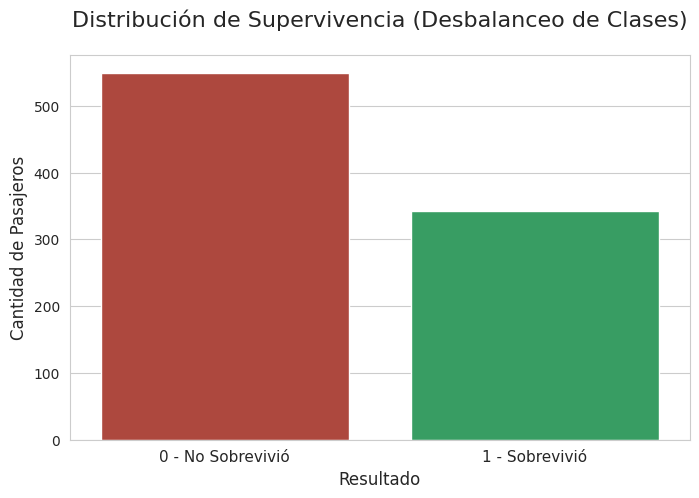


--- Análisis Exploratorio Básico Completo ---


In [8]:
# ---
# # Paso 6: Visualización del Desbalanceo
# ---
print("\nGenerando gráfico de desbalanceo...")

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear el gráfico de barras
# Usamos 'palette' para dar colores significativos (Rojo=No, Verde=Sí)
plt.figure(figsize=(8, 5)) # Definir tamaño de la figura
ax = sns.countplot(
    x='Survived',
    data=train_df,
    palette=['#c0392b', '#27ae60'], # Colores (Rojo para No, Verde para Sí)
    hue='Survived',   # <-- 1. Asignar 'x' a 'hue' (corrige FutureWarning)
    legend=False      # <-- 2. Poner legend=False (corrige FutureWarning)
)

# Añadir Títulos y Etiquetas
plt.title('Distribución de Supervivencia (Desbalanceo de Clases)', fontsize=16, pad=20)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.xlabel('Resultado', fontsize=12)

# Personalizar las etiquetas del eje X para mayor claridad
plt.xticks(ticks=[0, 1], labels=['0 - No Sobrevivió', '1 - Sobrevivió'], fontsize=11)

# Mostrar el gráfico
plt.show()


print("\n--- Análisis Exploratorio Básico Completo ---")



---



### Observamos los valores faltantes

In [9]:
print("Valores faltantes en 'train.csv':")

# .isnull().sum() nos da el total de datos NA (nulos) por columna.
# Filtramos para mostrar solo las columnas que tienen datos faltantes.

print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Valores faltantes en 'train.csv':
Age         177
Cabin       687
Embarked      2
dtype: int64


### Imputación de valores

#### Variable Age

In [10]:
# 1. Variable 'Age' (Edad)
# Rellenaremos la edad faltante con el promedio de edad de los datos

mean_age_train = train_df['Age'].mean()
print(f"Rellenando 'Age' de train con el promedio: {mean_age_train:.2f}")

train_df['Age'] = train_df['Age'].fillna(mean_age_train)

Rellenando 'Age' de train con el promedio: 29.70


#### Variable Embarked

In [11]:
# 3. Variable 'Embarked' (Puerto de embarque)
# Rellenamos los 2 datos faltantes con "S"

train_df['Embarked'] = train_df['Embarked'].fillna("S")

#### Volvemos a ver valores faltantes

In [12]:
print("Valores faltantes en 'train.csv':")

# .isnull().sum() nos da el total de datos NA (nulos) por columna.
# Filtramos para mostrar solo las columnas que tienen datos faltantes.

print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Valores faltantes en 'train.csv':
Cabin    687
dtype: int64


* Solo queda Cabin

In [13]:
# 4. Variable 'Cabin' (Cabina)
# --- Cálculo de porcentaje faltante para 'Cabin' ---

# Para train.csv
total_filas_train = len(train_df) # O df_train.shape[0]
nulos_cabin_train = train_df['Cabin'].isnull().sum()
porcentaje_train = (nulos_cabin_train / total_filas_train) * 100
print(f"Porcentaje de 'Cabin' faltante en train.csv: {porcentaje_train:.2f}%")

Porcentaje de 'Cabin' faltante en train.csv: 77.10%


### Label Encoder

In [14]:
train_df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [15]:
train_df["Sex"].dtype

dtype('O')

In [16]:
# 1. Importamos el módulo de preprocesamiento de la librería Scikit-Learn
# Este módulo contiene varias herramientas para preparar datos, no solo LabelEncoder.
from sklearn import preprocessing

# 2. Instanciamos (creamos) el objeto LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# 3. Ejecutamos 'fit_transform' sobre la columna "Sex"
# Esto hace dos cosas a la vez:
#   A. fit: Aprende que existen dos categorías: "Female" y "Male".
#   B. transform: Convierte "Female" -> 0 y "Male" -> 1 (por orden alfabético).
# El resultado se guarda en la misma columna.
train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])

In [17]:
train_df["Sex"].value_counts()

,count
Sex,
1,577
0,314


In [18]:
train_df["Sex"].dtype

dtype('int64')

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


### get_dummies

In [20]:
train_df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [21]:
train_df['Embarked'].count()

np.int64(891)

In [22]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# Convertir 'Embarked' (Texto) a numérico
# Usamos "One-Hot Encoding" (pd.get_dummies) que crea nuevas columnas (Embarked_S, Embarked_C, Embarked_Q)
# con valores 1 o 0, indicando el puerto.

In [24]:
train_df = pd.get_dummies(train_df, columns=['Embarked'])

In [25]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True


In [26]:
train_df['Embarked_C'].value_counts()

,count
Embarked_C,
False,723
True,168


In [27]:
train_df['Embarked_C'].count()

np.int64(891)

In [28]:
train_df['Embarked_Q'].value_counts()

,count
Embarked_Q,
False,814
True,77


In [29]:
train_df['Embarked_S'].value_counts()

,count
Embarked_S,
True,646
False,245


### Feature Selection

In [30]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False


In [31]:
# Seleccionar las variables (features) que usará el modelo

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [32]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False


In [33]:
# Definimos nuestras variables X (features) e y (target)

# 'X' son las columnas que usamos para predecir.
# 'y' es la columna que *queremos* predecir ('Survived').

X = train_df.drop('Survived', axis=1)

y = train_df['Survived']

In [34]:
# train_test_split: Para dividir nuestros datos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# X_train, y_train: 80% de los datos, para entrenar el modelo.
# X_test, y_test: 20% de los datos.

# 'test_size=0.2' significa 20% para prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print(f"Datos de entrenamiento divididos: {len(X_train)} para entrenar, {len(X_test)} para probar.")

Datos de entrenamiento divididos: 712 para entrenar, 179 para probar.


### DecisionTreeClassifier

In [35]:
# Importamos el árbol de decisión para clasificación

from sklearn.tree import DecisionTreeClassifier

#### Llamamos al modelo

In [36]:
# Llamamos al modelo
modelo = DecisionTreeClassifier()

#### Lo entrenamos

In [37]:
# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Realizamos las predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [39]:
# Precisión en datos de ENTRENAMIENTO
train_accuracy = modelo.score(X_train, y_train)

# Precisión en datos de PRUEBA
test_accuracy = modelo.score(X_test, y_test)

print(f"Precisión en Entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en Prueba:        {test_accuracy:.4f}")

Precisión en Entrenamiento: 0.9831
Precisión en Prueba:        0.8045


### max_depth

* **¿Qué pasa si no utilizamos max_depth?**

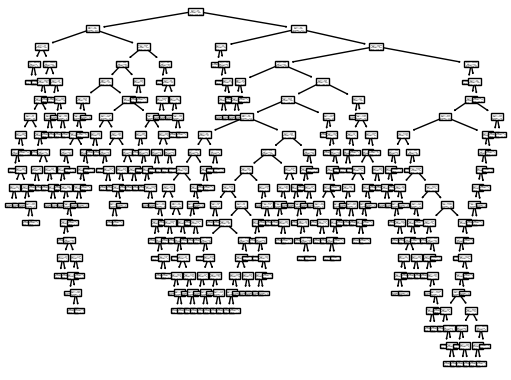

### Segundo modelo

In [40]:
modelo_2 = DecisionTreeClassifier(max_depth = 2)

In [41]:
modelo_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
# Realizamos las predicciones sobre el conjunto de prueba
y_pred = modelo_2.predict(X_test)

In [43]:
# Precisión en datos de ENTRENAMIENTO
train_accuracy = modelo_2.score(X_train, y_train)

# Precisión en datos de PRUEBA
test_accuracy = modelo_2.score(X_test, y_test)

print(f"Precisión en Entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en Prueba:        {test_accuracy:.4f}")

Precisión en Entrenamiento: 0.8048
Precisión en Prueba:        0.7598


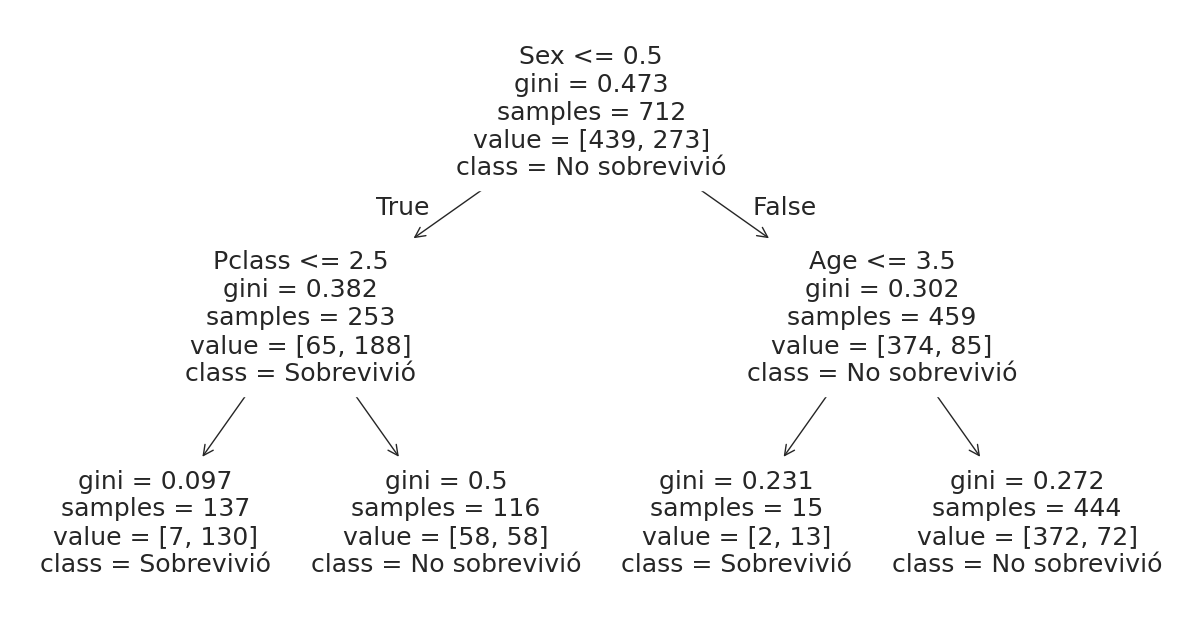

In [44]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(modelo_2, feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], class_names = ["No sobrevivió", "Sobrevivió"])
plt.show()

### Interpretación del Árbol de Decisión


1. **Nodo raíz (Punto de partida)**
División Clave: Sex <= 0.5. Esta es la característica más importante.

* **Contexto:** El nodo contiene 712 muestras. La mayoría (439) No sobrevivió.

* **Gini (0.473)**: El nivel inicial de impureza es alto, casi 0.5, lo que significa que las clases están bastante mezcladas.

2. **Rama Izquierda (True / Mujer)**
* **Camino de Alta Supervivencia:** Si la respuesta es True (es decir, Mujer), el modelo va a este nodo con 255 muestras.

* **Clase Mayoritaria:** La mayoría (193 contra 62) Sobrevivió. Esto confirma que el género femenino fue un fuerte predictor de supervivencia.


3. **(Rama Izquierda) Siguiente Pregunta:** Pclass <= 2.5 (¿Viaja en 1ª o 2ª clase?).

* **Resultado Final (Izquierda):** Si es Mujer Y está en 1ª/2ª clase (142 muestras), la supervivencia es casi segura: 135 Sobreviven vs. solo 7 que no. (Gini muy bajo: 0.094)

* **Resultado Final (Derecha):** Si es Mujer Y está en 3ª clase (113 muestras), la supervivencia se mantiene, pero está mucho más dividida: 58 Sobreviven vs. 55 que no. (Gini de 0.5, máxima impureza).

4. **Rama Derecha (False / Hombre)**

* **Camino de Baja Supervivencia:** Si la respuesta es False (es decir, Hombre), el modelo va a este nodo con 457 muestras.

* **Clase Mayoritaria:** Una gran mayoría (377 contra 80) No sobrevivió.

5. **Siguiente Pregunta:** Pclass <= 1.5 (¿Viaja en 1ª clase?).

* **Resultado Final (Izquierda):** Si es Hombre Y está en 1ª clase (97 muestras), la supervivencia es baja, pero existe: 63 No sobreviven vs. 34 que sí.

* **Resultado Final (Derecha):** Si es Hombre Y no está en 1ª clase (360 muestras, es decir, 2ª o 3ª clase), la probabilidad de No sobrevivir es abrumadora: 314 vs. 46.

### Nuevo nivel de profundidad

**¿Qué pasa si agregamos dos niveles más?**

In [45]:
modelo_3 = DecisionTreeClassifier(max_depth = 4)
modelo_3.fit(X_train,y_train)

# Realizamos las predicciones sobre el conjunto de prueba
y_pred = modelo_3.predict(X_test)

In [46]:
# Precisión en datos de ENTRENAMIENTO
train_accuracy = modelo_3.score(X_train, y_train)

# Precisión en datos de PRUEBA
test_accuracy = modelo_3.score(X_test, y_test)

print(f"Precisión en Entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en Prueba:        {test_accuracy:.4f}")

Precisión en Entrenamiento: 0.8413
Precisión en Prueba:        0.7933


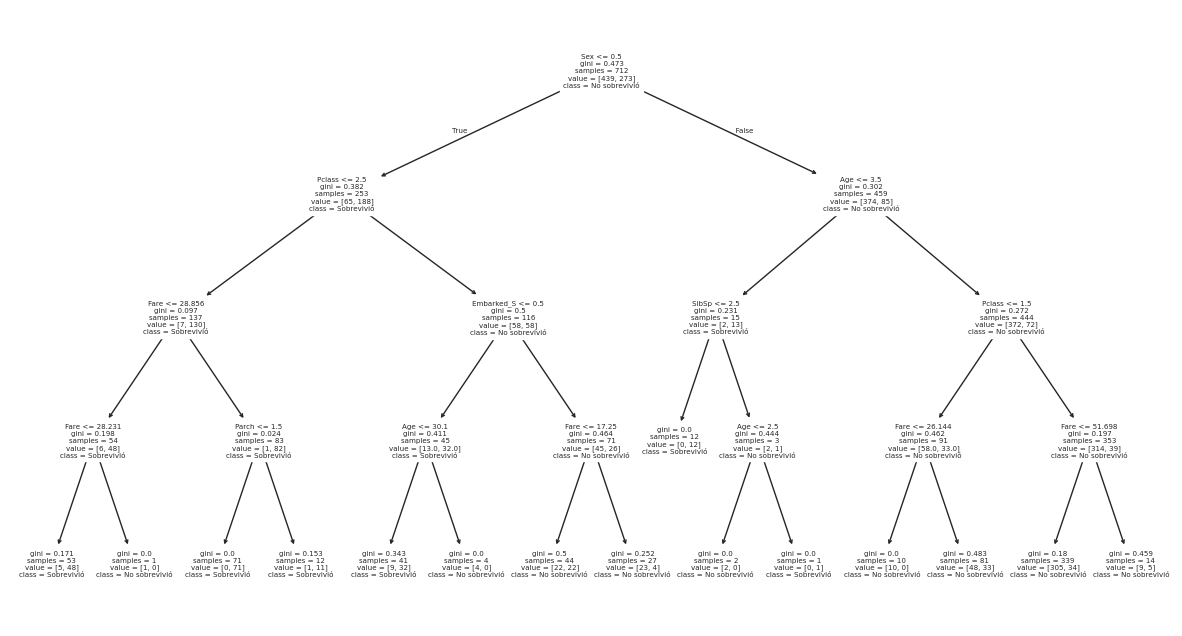

In [47]:
plt.figure(figsize = (15,8))
tree.plot_tree(modelo_3, feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], class_names = ["No sobrevivió", "Sobrevivió"])
plt.show()

### Matriz de Confusión

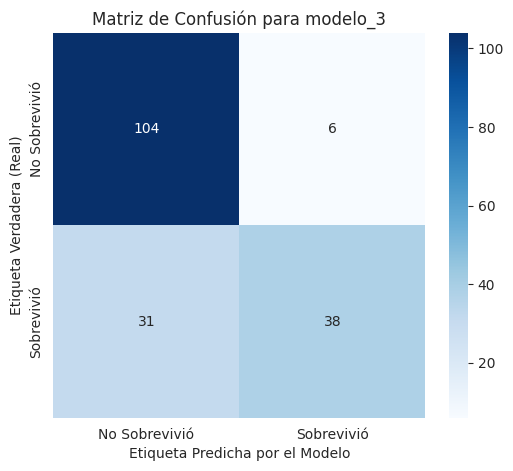

In [49]:
from sklearn.metrics import confusion_matrix

# 1. Generar predicciones
y_pred = modelo_3.predict(X_test)

# 2. Calcular la Matriz de Confusión
# Se compara lo que realmente ocurrió (y_test) contra lo que predijo el modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# 3. Visualizar la Matriz de Confusión usando Seaborn (Mejor visualización)
plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, # Mostrar los números dentro de los cuadros
            fmt='d',    # Formato decimal para los números
            cmap='Blues', # Color del mapa de calor
            xticklabels=["No Sobrevivió", "Sobrevivió"], # Etiquetas del eje X (Predicho)
            yticklabels=["No Sobrevivió", "Sobrevivió"]) # Etiquetas del eje Y (Real)

plt.ylabel('Etiqueta Verdadera (Real)')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión para modelo_3')
plt.show()

**Resumen de Rendimiento**

**Aciertos (Diagonal Principal):** El modelo acertó 142 veces en total (104 + 38).

-   Acertó (VN) en 104 casos al predecir correctamente que alguien No Sobreviviría.

-   Acertó (VP) en 38 casos al predecir correctamente que alguien Sobreviviría.

**Errores (Diagonal Secundaria):** El modelo se equivocó 37 veces en total (31 + 6).

* **Error de tipo 1 (FP = 6):** Solo 6 personas que realmente No Sobrevivieron fueron predichas erróneamente como sobrevivientes.

* **Error de tipo 2 (FN = 31):** El error más común fue predecir que alguien No Sobreviviría, cuando en realidad Sí Sobrevivió.

### Scores

**Accuracy (Exactitud):** ¿Qué porcentaje acertó en total? (Global).

**Precision (Precisión):** Cuando predijo "Sí", ¿cuántas veces tuvo razón? (Calidad).

**Recall (Sensibilidad):** De todos los "Sí" reales, ¿cuántos encontró? (Cantidad).

**F1-Score:** Promedio balanceado entre Precision y Recall. (El equilibrio).

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [57]:
# Mostramos los resultados
print(f"Accuracy:  {accuracy:.2f}  (79% de aciertos globales)")
print(f"Precision: {precision:.2f}  (86% de confiabilidad al predecir sobrevivientes)")
print(f"Recall:    {recall:.2f}  (55% de los sobrevivientes reales encontrados)")
print(f"F1-Score:  {f1_score:.2f}  (Balance general)")

Accuracy:  0.79  (79% de aciertos globales)
Precision: 0.86  (86% de confiabilidad al predecir sobrevivientes)
Recall:    0.55  (55% de los sobrevivientes reales encontrados)
F1-Score:  0.67  (Balance general)


Una Precision alta (0.86) pero un Recall bajo (0.55) podría significar que el modelo es "cauteloso": dice pocas veces que alguien sobrevivió, pero cuando lo dice, suele tener razón. Sin embargo, se le están escapando muchos sobrevivientes reales (Errores Tipo 2).